In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
import statistics as st
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# K Nearest Neighbors (KNN)

In [2]:
def euclidian(point, data):
    #calculate the euclidean distance: sqrt((x1-y1)^2 + (x2-y2)^2 + ...)
    dist = np.sqrt(np.sum((point - data)**2, axis=1))
    return dist

In [3]:
#Check: 
data = np.array([[1,2,3,4],[5,6,7,8]])
point = np.array([3,3,3,3])
euclidian(point, data)

array([2.44948974, 7.34846923])

In [4]:
def mode(values):
    mode = st.mode(values)
    return mode

In [5]:
#Check:
values = [3,3,3,3,3,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,8]
values = ['happy', 'sad', 'happy', 'sad', 'sad']
mode(values)

'sad'

In [6]:
class KNN:
    def __init__(self, k = 5):
        self.k = k
        self.dist = euclidian
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(mode, neighbors))
    
    def evaluate(self, X_test, y_test):
        y_hat = self.predict(X_test)
        accuracy = sum(y_hat == y_test) / len(y_test)
        return accuracy

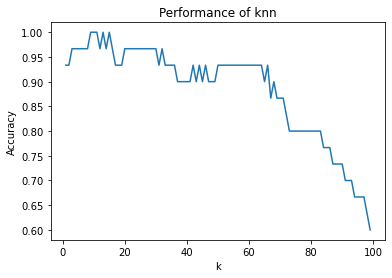

In [7]:
# Testing my Model with the IRIS dataset
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Preprocess data
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)
# Test knn model across varying ks
accuracies = []
ks = range(1, 100)
for k in ks:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

# K-Means Clustering

In [8]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [9]:
X = pd.read_excel('TrainFull.xlsx').iloc[:, 1:]
x = np.array(X.loc[:, ['Life Ladder', 'Social support']])

In [10]:
def calcerror(data, rnk, centers):
    err = 0.0
    for i in np.arange(len(centers)):
        err = err + np.sum((np.linalg.norm(data[np.where(rnk==i)[0], :] - centers[i], axis=1))**2, axis=0)
    return err

def kmeans(data, k):
    num = 5  
    error = -1
    fincenters = None
    finrnk = None
    
    # run 5 models and only update the final centers and labels if the error is lower than the previous
    for l in np.arange(num):
        # step 1
        centers = data[random.sample(range(data.shape[0]), k), :]
        newcenters = np.zeros(centers.shape)
        abort = 0    
        # cap the algorithm at 10 iterations, any more and it will just use up computational time
        for j in np.arange(10):
            # step 2
            temp = np.empty([len(centers), len(data)])
            for i in np.arange(len(centers)):
                temp[i] = (np.linalg.norm(data - centers[i], axis=1))**2
            dist = pd.DataFrame(temp.T)
            rnk = np.array(dist.idxmin(axis=1))

            if(abort):
                break
            # step 3
            for i in np.arange(len(centers)):
                newcenters[i] = np.sum(data[np.where(rnk==i)[0], :], axis=0) / len(np.where(rnk==i)[0])

            if(np.array_equal(centers, newcenters)):
                abort = 1
            centers = newcenters
            
        if(error == -1):
            error = calcerror(data, rnk, centers)
            fincenters = centers
            finrnk = rnk
        elif(error > calcerror(data, rnk, centers)):
            fincenters = centers
            finrnk = rnk
            error = calcerror(data, rnk, centers)
            
    return(fincenters, finrnk)

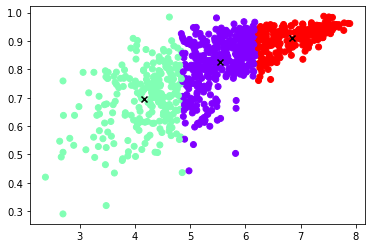

In [11]:
centers, labels = kmeans(x, 3)
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='black')

In [12]:
X.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Social support'],
      dtype='object')

Text(0.5, 0, 'Social Support')

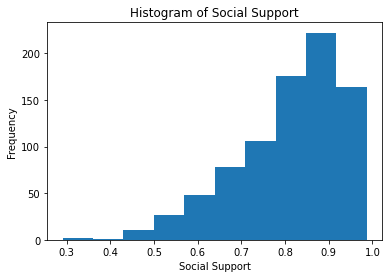

In [13]:
plt.hist(X['Social support'])
plt.title('Histogram of Social Support')
plt.ylabel('Frequency')
plt.xlabel('Social Support')

In [14]:
sum(X['Social support'] > 0.9)

238

In [15]:
sum((X['Social support'] <= 0.9) & (X['Social support'] > 0.75))

376

In [16]:
sum(X['Social support'] <= 0.75)

220

In [17]:
X['SSClass'] = 0

In [18]:
X.loc[(X['Social support'] <= 0.9) & (X['Social support'] > 0.75),'SSClass'] = 1
X.loc[X['Social support'] > 0.9,'SSClass'] = 2

In [19]:
X.SSClass.value_counts()

1    376
2    238
0    220
Name: SSClass, dtype: int64

In [20]:
# Using KNN to categorize 
train = pd.read_excel('TrainFull.xlsx').iloc[:,1:]
train['SSClass'] = 0
train.loc[(train['Social support'] <= 0.9) & (train['Social support'] > 0.75)
          ,'SSClass'] = 1
train.loc[train['Social support'] > 0.9,'SSClass'] = 2

test = pd.read_excel('TestFull.xlsx').iloc[:,1:]
test['SSClass'] = 0
test.loc[(test['Social support'] <= 0.9) & (test['Social support'] > 0.75)
          ,'SSClass'] = 1
test.loc[test['Social support'] > 0.9,'SSClass'] = 2


X_train = train.iloc[:,2:11]
y_train = train.SSClass
X_test = test.iloc[:, 2:11]
y_test = test.SSClass

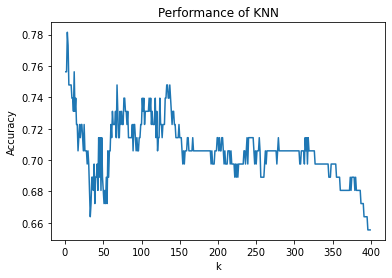

In [36]:
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)
# Test knn model across varying ks
accuracies = []
ks = range(1, 400)
for k in ks:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of KNN")
plt.show()

In [37]:
results = pd.DataFrame({'accuracies':accuracies}, index = np.arange(1,100))
results[results.accuracies == max(results.accuracies)]

ValueError: Length of values (399) does not match length of index (99)

In [38]:
X_train.shape

(834, 9)